# Lab 23 - KPCA
## Lecture 23

In [105]:
library('kernlab')

In [106]:
?kpca

kpca {kernlab},R Documentation
x,"the data matrix indexed by row or a formula describing the model, or a kernel Matrix of class kernelMatrix, or a list of character vectors"
data,an optional data frame containing the variables in the model (when using a formula).
kernel,"the kernel function used in training and predicting. This parameter can be set to any function, of class kernel, which computes a dot product between two vector arguments. kernlab provides the most popular kernel functions which can be used by setting the kernel parameter to the following strings: rbfdot Radial Basis kernel function ""Gaussian"" polydot Polynomial kernel function vanilladot Linear kernel function tanhdot Hyperbolic tangent kernel function laplacedot Laplacian kernel function besseldot Bessel kernel function anovadot ANOVA RBF kernel function splinedot Spline kernel The kernel parameter can also be set to a user defined function of class kernel by passing the function name as an argument."
kpar,"the list of hyper-parameters (kernel parameters). This is a list which contains the parameters to be used with the kernel function. Valid parameters for existing kernels are : sigma inverse kernel width for the Radial Basis kernel function ""rbfdot"" and the Laplacian kernel ""laplacedot"". degree, scale, offset for the Polynomial kernel ""polydot"" scale, offset for the Hyperbolic tangent kernel function ""tanhdot"" sigma, order, degree for the Bessel kernel ""besseldot"". sigma, degree for the ANOVA kernel ""anovadot"". Hyper-parameters for user defined kernels can be passed through the kpar parameter as well."
features,"Number of features (principal components) to return. (default: 0 , all)"
th,the value of the eigenvalue under which principal components are ignored (only valid when features = 0). (default : 0.0001)
na.action,"A function to specify the action to be taken if NAs are found. The default action is na.omit, which leads to rejection of cases with missing values on any required variable. An alternative is na.fail, which causes an error if NA cases are found. (NOTE: If given, this argument must be named.)"
...,additional parameters
pcv,a matrix containing the principal component vectors (column wise)
eig,The corresponding eigenvalues


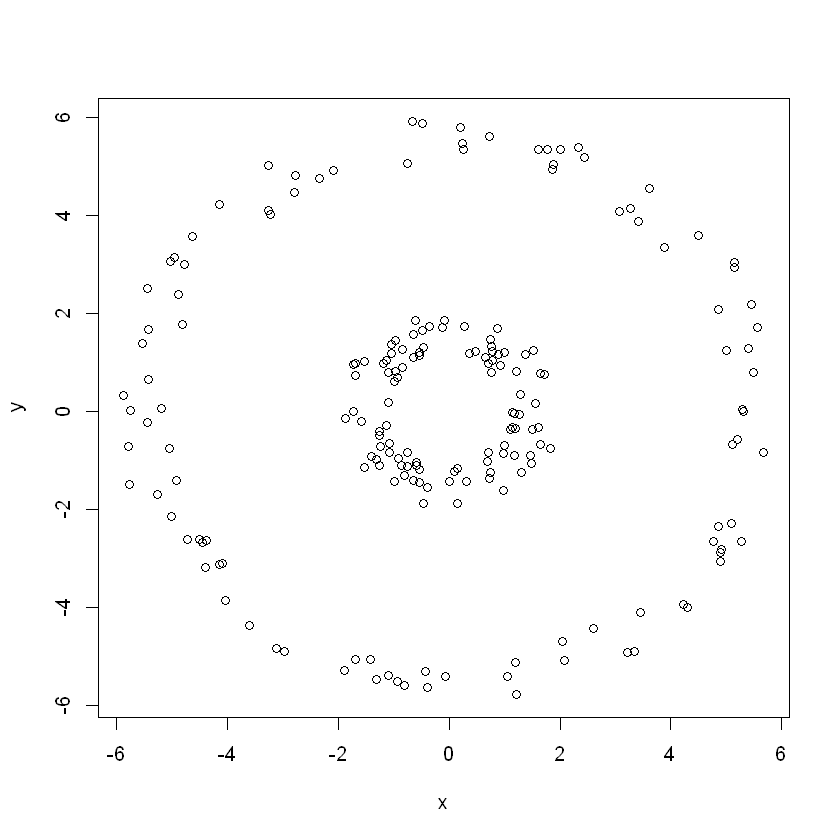

In [158]:
polar0 = data.frame(r=1+runif(100,.1),theta=seq(0,2*pi,length.out=100)+runif(100,.1))
polar1 = data.frame(r=5+runif(100,.1),theta=seq(0,2*pi,length.out=100)+runif(100,.1))
polar = rbind(polar0,polar1)
cart = data.frame(x=polar$r*cos(polar$theta),y=polar$r*sin(polar$theta))
plot(cart)

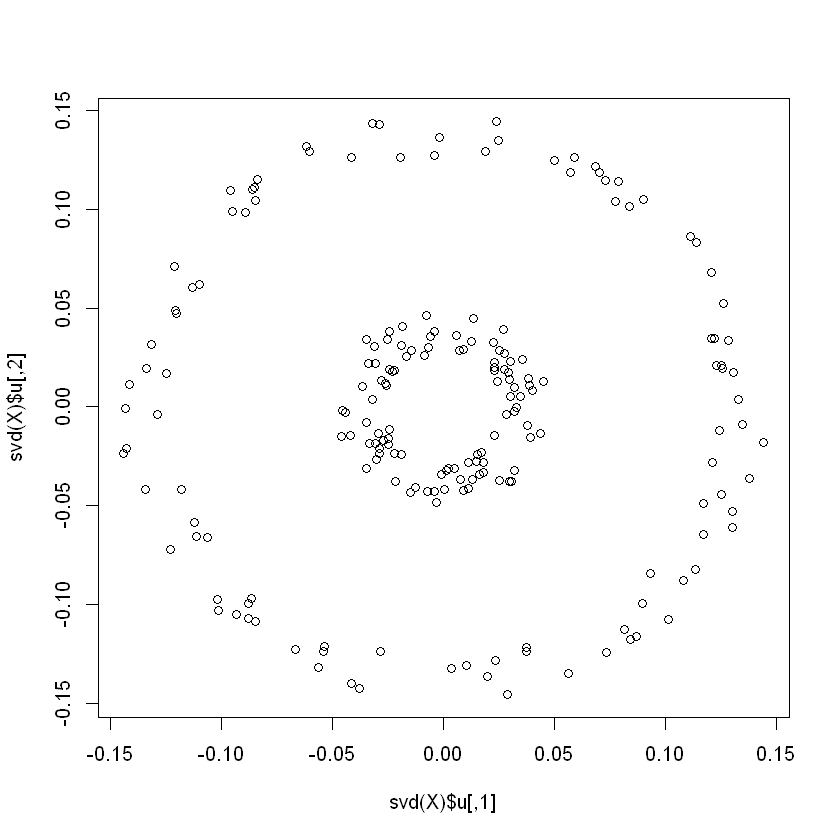

In [159]:
X = as.matrix(cart)
plot(svd(X)$u)

In [162]:
kpca.out = kpca(X,kernel='rbfdot',kpar=list(sigma=.2),features=2)

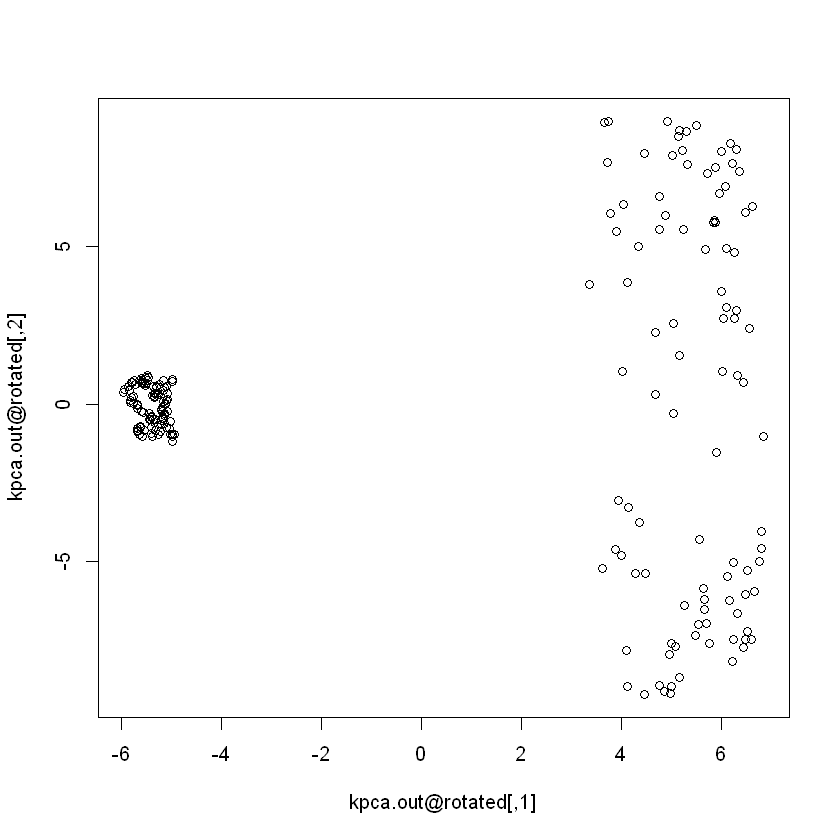

In [163]:
plot(kpca.out@rotated)

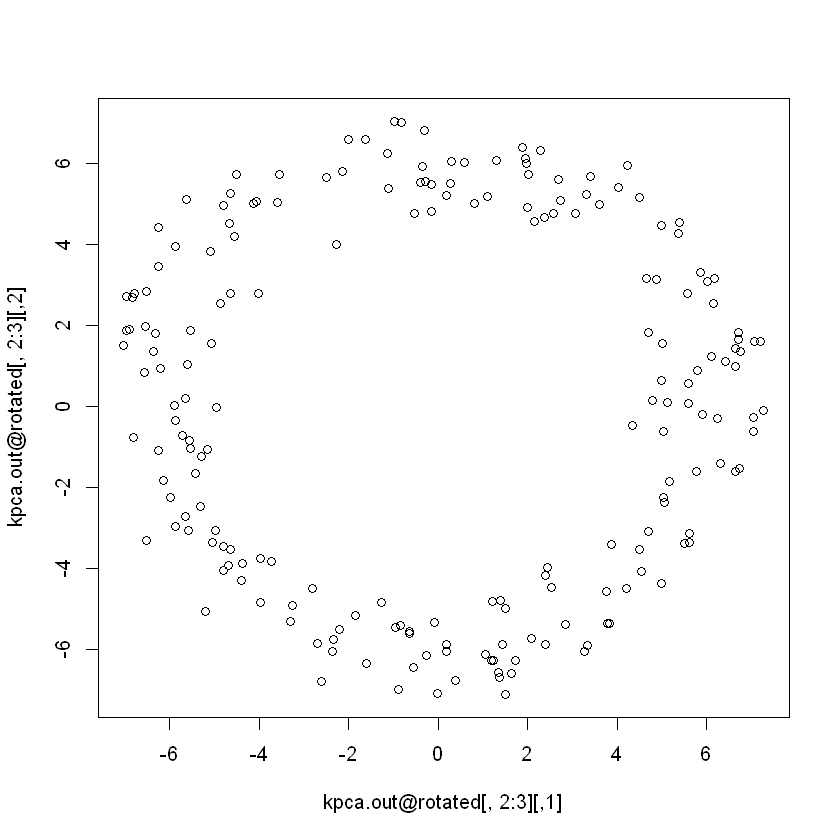

In [183]:
kpca.out = kpca(X,kernel='rbfdot',kpar=list(sigma=.1),features=3)
plot(kpca.out@rotated[,2:3])